In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datatable as dt
import numpy as np
from collections import Counter
import statistics
import seaborn as sns
from datetime import datetime

In [2]:
profiles=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_profiles.csv").to_pandas()

In [3]:
locations=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_locations.csv").to_pandas()

In [4]:
posts=dt.fread(r"D:\DATASET_ADM-HW2\archive\instagram_posts.csv", 
               sep="\t", 
               columns={"profile_id","location_id","post_type","numbr_likes","number_comments","cts"}).to_pandas()

In [5]:
likes=posts.numbr_likes.dropna()
comments=posts.number_comments.dropna()

#### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

Let's see if there's a linear relationship between the two considered variables 

In [6]:
likes.corr(comments, method = "pearson")

0.3744527992482448

Assuming a linear relationship between the variables "number of likes" and "number of posts", we calculate the linear pearson correlation coefficient, which has a value of 0.374. This means that the (linear) relationship between the variables is rather low, so it cannot be said that a higher number of likes means a higher number of comments. 

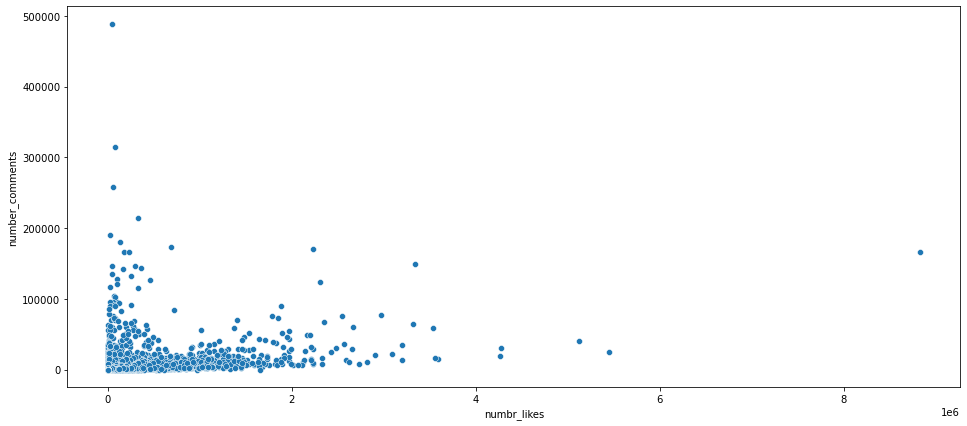

In [137]:
fig, ax = plt.subplots(figsize =(16, 7))
sns.scatterplot(x=likes,y=comments)
plt.show()

The intuition gained from analysing the linear relationship between the two variables is confirmed by looking at the scatterplot.
In fact, if a greater number of likes implied a greater number of comments, the cloud of points should follow an increasing trend along the bisector of the plane (in the case of positive correlation) or a descending trend perpendicular to the bisector of the plane (in the case of negative correlation). 

#### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

Since the dataset has a fairly large number of outliers, we will use the median, which is a robust estimator with respect to outliers, to compare the distributions.

In [7]:
from posts.publishing import find_posts_between

In [8]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]
interval_labels = list(map(lambda interval : f"{interval[0]} - {interval[1]}", intervals))

In [9]:
# I created a dictionary in which I put the different intervals as keys 
my_dict_likes=dict.fromkeys(intervals)

In [10]:
# I assign for each key ( i mean for each interval) the number of likes
for interval in intervals:
    start, end = interval
    found = find_posts_between(posts, start, end)
    sum_likes=found.numbr_likes.values + 1    
    my_dict_likes[interval] = (sum_likes)

In [31]:
# I created a list in which I put the logarithm of the number of likes for each post. 
# I will need this for the graphical representation: a graphical representation made using the 
# logarithm is more readable.
y_likes = []
for value in my_dict_likes.values():
    value = np.log(value)
    y_likes.append(value)

In [49]:
# I compute the median
median_likes=np.median(posts.numbr_likes.dropna())

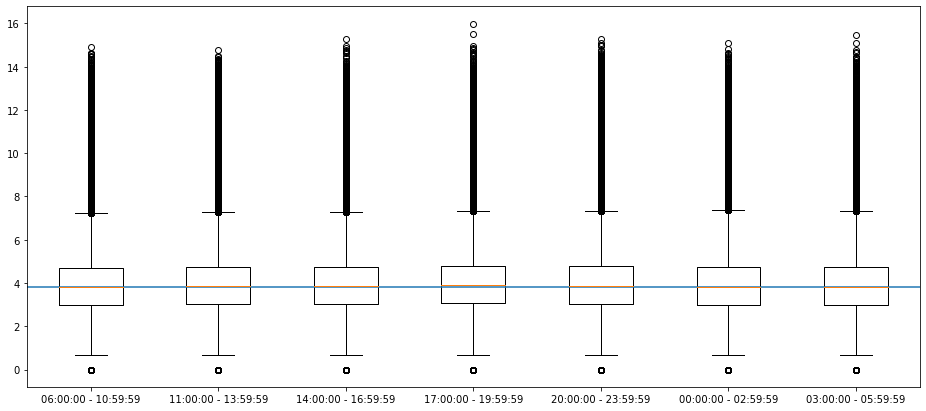

In [50]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.boxplot(y_likes, labels=interval_labels)
plt.axhline(y=np.log(median_likes)) # This is the median of the entire distribution
plt.show()

In [ ]:
# Now the problem is: how is it possible that the median value of likes for different time slots 
# is always the same?
# How is it possible that posts published at night have the same number of likes as those published 
# during the day? It doesn't make sense.
# There were two things I thought of:
# 1) despite the logarithm, however, the values are too large to be correctly interpreted so the 
# distribution would be rescaled to make the boxplots even less 'compressed'
# 2) only one time zone was considered for all posts, even if posted in different countries.
# I mean, if for example only the American time zone was considered, a post put up at 11 a.m. in Italy
# was recorded as being put up at 2 a.m. in America. 
# So considering the time zones of all the countries of the world, the number of likes per post is
# the same even in the strangest time slots, like 3am to 6am. 

In [40]:
# now I do all the same for number of comments.
my_dict_comments=dict.fromkeys(intervals)

In [21]:
#I assign for each key=interval the number of comments  
for interval in intervals:
    start, end = interval
    found = find_posts_between(posts, start, end)
    sum_comments=found.number_comments.values + 1    
    my_dict_comments[interval] = (sum_comments)
    

In [22]:
y_comments = []
for value in my_dict_comments.values():
    value = np.log(value)
    y_comments.append(value)

In [42]:
median_comments=np.median(posts.number_comments.dropna())

0.6931471805599453

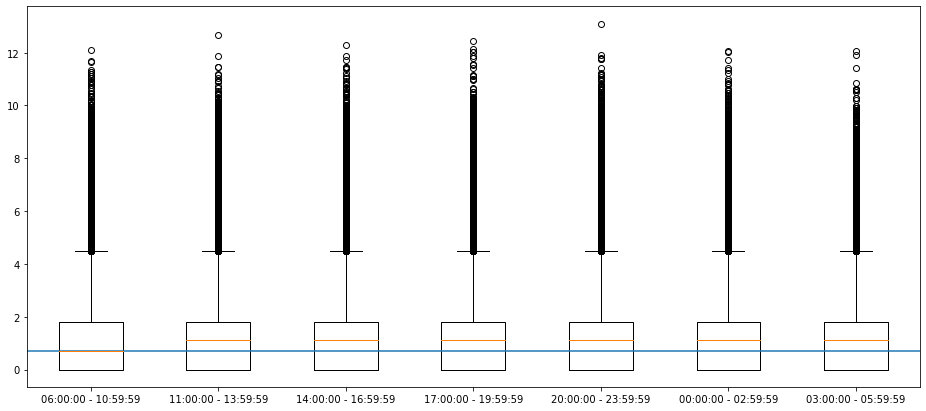

In [39]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.boxplot(y_comments, labels=interval_labels)
plt.axhline(y=np.log(median_comments))
plt.show()

In [ ]:
# How is it possible that the number of comments per post in time slots is ALWAYS 
# greater than the overall number of comments?

#### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [12]:
followers=profiles.followers.dropna()

To make the graph more interpretable, let us rescale the distribution on a logarithmic scale.
Having a number of profiles with zero followers, before doing the logarithm we increase all the units by 1 so as not to have any problems in calculating the logarithm. 

In [10]:
followers_=followers.apply(lambda x: x+1)

In [8]:
distr_followers=followers_.apply(np.log)

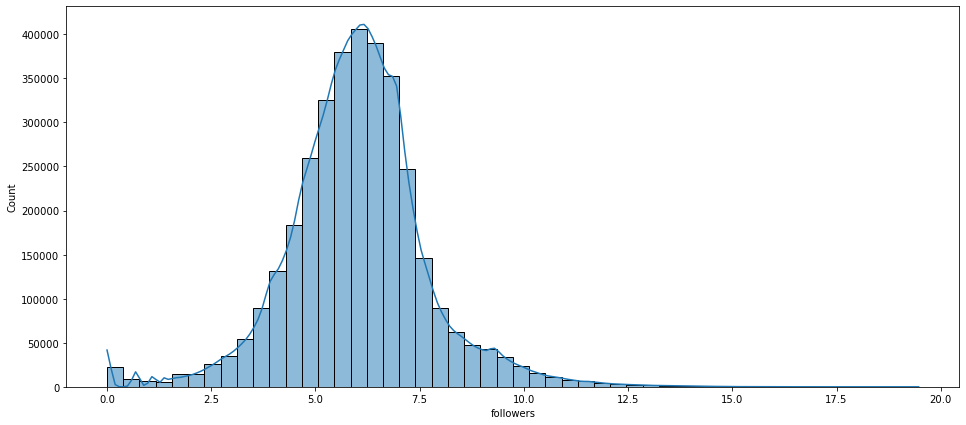

In [9]:
fig, ax = plt.subplots(figsize =(16, 7))
sns.histplot(distr_followers,bins=50,kde=True)
plt.show()

In [22]:
followers_mean=np.mean(followers)
followers_mode=statistics.mode(followers)
first_quantile=np.quantile(followers,0.25)
third_quantile=np.quantile(followers,0.75)
print("On average, each profile has",int(np.round(followers_mean)),"followers.")
print("\n")
print(f"The mode of the distribution, i.e. the value that appears most often in the dataset, is: {int(followers_mode)}. Applying the \nvalue_counts function, it can be seen that more than 22 thousand users with zero followers are \nregistered in the profile dataset: this explains why the modal value is zero.")
print("\n")
print("The first quartile of the distribution is:",first_quantile)
print("The third quartile of the distribution is:",third_quantile)

On average, each profile has 4740 followers.


The mode of the distribution, i.e. the value that appears most often in the dataset, is: 0. Applying the 
value_counts function, it can be seen that more than 22 thousand users with zero followers are 
registered in the profile dataset: this explains why the modal value is zero.


The first quartile of the distribution is: 159.0
The third quartile of the distribution is: 974.0


In [ ]:
# I don't know if these outputs have to be commented.. 
# I wouldn't even know what to say... explain better what the quantiles are?

#### What are histograms, bar plots, scatterplots and pie charts used for?
- A histogram is a graphical representation used to visualise the (approximate) distribution of a numerical variable. 
To construct a histogram, the range of values taken by the variable is subdivided into classes: for each class, a rectangle is constructed with a base equal to the width of the class and a height equal to the number of observations that fall within that class.
- A barplot is use to show the relationship between a numeric and a categorical variable. Each value taken by the categorical variable is represented by a bar while the height of the bar represents its numerical value. 
- The scatter plot makes it possible to visualise the relationship between two quantitative variables. 
In this type of graph, the two variables are plotted on a Cartesian space: the values of one variable are shown on the horizontal x-axis, while the values of the other variable are represented on the vertical y-axis.
Each statistical unit is represented by a point positioned on the graph according to its coordinates. So this graph will consist of as many points as there are statistical units under study. 
- A pie chart shows the relationship between parts and an integer for a variable. Basically, it is a circumference divided into areas and each area represents the count or percentage of observations at one level for the variable.
They are used for nominal or categorical data.

#### What insights can you extract from a Box Plot?
Box plots provide a quick summary of the variability of values in a data set. They show, reading from bottom to top (or left to right), the minimum, first quartile, median, third quartile and maximum of the distribution.
They also show any outliers in the data set.